# Libraries required

In [8]:
%pip install statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 69.4 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 8.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


# Time Series - Forecasting Energy Inflation in Belgium

DataSource: https://stats.oecd.org/Index.aspx?DataSetCode=MIG

Search Inflation or whatever you want, you will be able to select the countries, frequency and even the years for your dataset.

## Notebook Content:

0. Concepts
1. Reading Dataset
2. Stationarizing Series
3. Find Optimal SARIMA Configuration
4. Developing SARIMA Model
5. Conclusion



## 0. Concepts

### univariate time series

The term "univariate time series" refers to a time series that consists of single (scalar) observations recorded sequentially over equal time increments. Some examples might be: Inflation on a monthly basis, Temperature on an hourly basis, Sales on a daily basis, etc.

### endogenous data

An input variable is endogenous if it is affected by other variables in the system and the output variable depends on it. In a time series, the observations for an input variable depend upon one another. For example, the observation at time t is dependent upon the observation at t-1; t-1 may depend on t-2.

### stationarity

In the most intuitive sense, stationarity means that the statistical properties of a process generating a time series do not change over time. It does not mean that the series does not change over time, just that the way it changes does not itself change over time. The algebraic equivalent is thus a linear function, perhaps, and not a constant one; the value of a linear function changes as 𝒙 grows, but the way it changes remains constant — it has a constant slope; one value that captures that rate of change.

### ARIMA

An autoregressive integrated moving average, or ARIMA, is a statistical analysis model that uses time series data to either better understand the data set or to predict future trends. 

A statistical model is autoregressive if it predicts future values based on past values. For example, an ARIMA model might seek to predict a stock's future prices based on its past performance or forecast a company's earnings based on past periods.


### Differencing

 When the time series data has a trend/seasonality, the data is non-stationary in nature. If the non-stationary data is to be converted into a stationary data, the difference between consecutive observations is computed, which is known as 'differencing'.

### ACF or PACF Plots

**ACF (Autocorrelation Function)** and **PACF (Partial Autocorrelation Function)** plots are tools that are used in time series analysis to determine the order of an autoregressive model (AR) and moving average model (MA) respectively. 
An autoregressive model is a statistical model that uses past values of a time series to predict future values. The order of the model (p) refers to the number of past values that are used in the prediction. The ACF plot is used to determine the order of an autoregressive model. It shows the correlation between a time series and its lags. If the ACF plot shows a significant correlation at a certain lag, it suggests that an autoregressive term should be included in the model at that lag.
A moving average model is a statistical model that uses a set of past forecast errors to predict future values. The order of the model (q) refers to the number of past forecast errors that are used in the prediction. The PACF plot is used to determine the order of the moving average model. It shows the correlation between a time series and its lags after controlling for the effect of the intervening lags. If the PACF plot shows a significant correlation at a certain lag, it suggests that a moving average term should be included in the model at that lag.
In summary, the ACF plot is used to identify the order of the autoregressive component (AR) of the model, and the PACF plot is used to identify the order of the moving average component (MA) of the model.

### Lag

A lag in time series analysis refers to the difference in time between an observation and the previous observation. It is a way to measure the correlation between a variable and itself at different points in time. For example, if we are analyzing a time series of daily temperature data, a lag of 1 would represent the difference in temperature between today and yesterday, a lag of 2 would represent the difference between today and the day before yesterday, and so on. In an autoregressive model (AR), a lag represents the number of past observations that are used to predict the current observation, while in moving average model (MA) a lag represents the number of past forecast errors that are used to predict the current value.

In the context of ACF and PACF plots, the x-axis represents the lag, and the y-axis represents the correlation coefficient between the time series and its lags. The ACF plot shows the correlation between a time series and its lags and the PACF plot shows the correlation between a time series and its lags after controlling for the effect of the intervening lags. By looking at the autocorrelation at different lags, we can determine the order of the autoregressive or moving average component of the model.

### Unit root

A unit root is a statistical concept used in time series analysis. It refers to a characteristic of a time series where the value of the series at time t is a linear function of the value at time t-1, plus a random error term. In other words, a unit root is a pattern in a time series where the current value of the series is determined by its past values and a random error term.

A time series with a unit root is said to be non-stationary, because its statistical properties (such as mean and variance) change over time. The presence of a unit root in a time series makes it difficult to model and forecast, because the series is not stationary and cannot be treated as such.


### Time series evaluation metrics 

There are several evaluation metrics commonly used to evaluate time series models, including:

- **Mean Absolute Error (MAE):** This metric calculates the average difference between the predicted values and the actual values. The smaller the MAE, the better the model is at making accurate predictions.

- **Mean Squared Error (MSE):** This metric calculates the average of the squared difference between the predicted values and the actual values. It is similar to MAE but it gives more weight to larger errors.

- **Root Mean Squared Error (RMSE):** This metric is the square root of the MSE. It is an interpretable error metric as it is in the same unit as the original time series.

- **Mean Absolute Percentage Error (MAPE):** This metric calculates the average percentage difference between the predicted values and the actual values. This can be useful when the time series has large fluctuations or when you want to compare the performance of a model across different time series.

- **Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC):** These are model selection criteria that help to choose the best model among a set of models by penalizing models with more parameters. AIC and BIC balances the goodness of fit and the number of parameters in the model, where lower values indicate a better model.

- **Correlation Coefficient (R-squared):** This metric is used to measure the proportion of the variation in the dependent variable that can be explained by the independent variables. In the context of time series, it measures the proportion of variation in the observed data that can be explained by the model.

- **Realization Rate:** This metric compares the forecasted values to the actual values, it can be used to check if the model is able to predict certain events or patterns that occur in the time series, such as spikes or sudden changes.

- Plotting the forecasted and actual values: This is a visual way to check if the model is able to capture the trend, seasonality and noise of the time series.

It is important to note that some of these evaluation metrics may be more suitable depending on the specific problem, and that a good model should have low values for multiple evaluation metrics.



## 1. Reading dataset 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

# style for plots
plt.style.use('Solarize_Light2')

# ignore warnings
warnings.filterwarnings('ignore')

# import data
def load_data(file_name):
    # load from CSV file
    dataset = pd.read_csv(file_name, header=0, sep=',')
    
    # Convert from YYYY-MM to YYYY-MM-DD
    dataset['ds'] = pd.to_datetime(dataset['ds'], format='%Y-%m')

    # order ascending data values
    dataset = dataset.sort_values(by='ds', ascending=True)
    
    # set date column as index
    dataset.set_index('ds', inplace=True)
    
    return dataset
    
df = load_data(file_name='Belgium.csv')
df.tail()

,y
ds,
2022-08-01,49.81301
2022-09-01,60.54152
2022-10-01,63.02932
2022-11-01,36.07386
2022-12-01,32.88156


The given data consists of univariate time series, with the y column representing the endogenous data that we aim to analyze. Each instance in the dataset represents the energy inflation for a specific month. The process for performing autoregressive modeling involves several steps:

- **Stationarity check:** The time series must first be made stationary before using ARIMA for forecasting. If the series is not stationary, it must be made so through differencing or transformation. The number of differences required will be determined by checking for seasonal differencing as well.

- **Optimal order selection:** The order of the terms in the model can be determined by analyzing the ACF and PACF plots. A stepwise approach can also be used to find the best order.

- **Model building:** The model is then developed and the number of periods to be forecasted is set, depending on the specific needs. Autoregressive methods are typically used to forecast a few periods ahead.

- **Model validation:** The predicted values are compared to the actual values in the validation sample. Residuals are analyzed and basic evaluation metrics (such as AIC, RMSE, and MAE) are set.

Finally, we will also visualize the target time series.

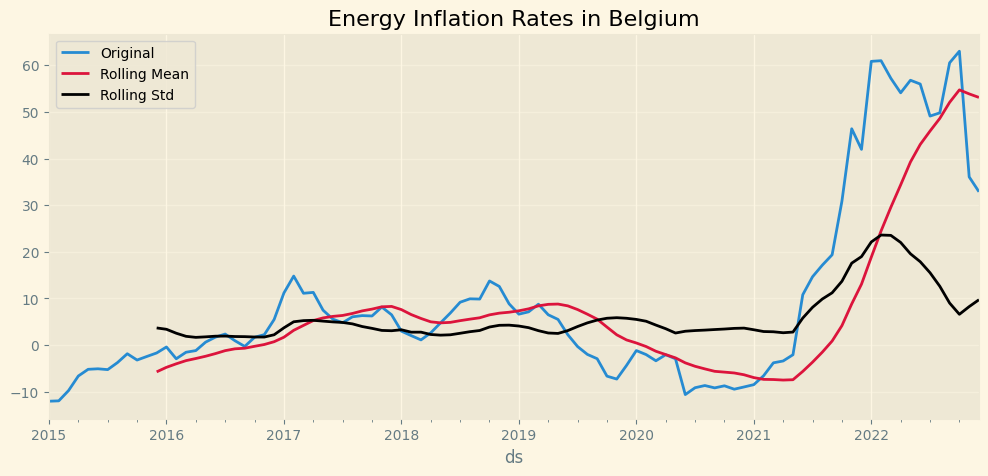

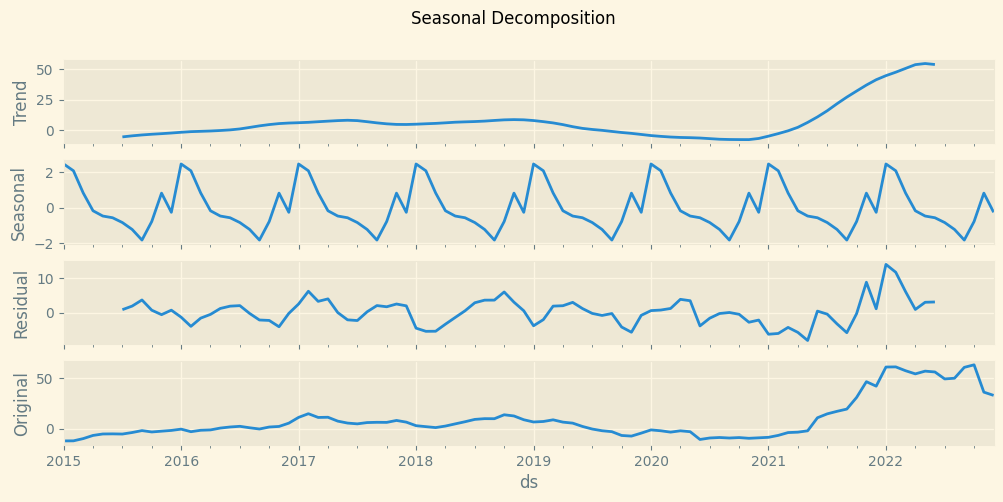

In [9]:
# 2. Plot time series
def plot_time_series(series):
    #Calculates the rolling mean  and rolling standard deviation of the time series using a window size of 12
    mean_rolling = series.rolling(window=12).mean()
    std_rolling = series.rolling(window=12).std()
    
    # plot inflation rates and rolling mean and standard deviation
    series.plot(figsize=(12, 5), label='Original')
    mean_rolling.plot(color='crimson', label='Rolling Mean')
    std_rolling.plot(color='black', label='Rolling Std')
    plt.title('Energy Inflation Rates in Belgium')
    plt.grid(axis='y', alpha=0.5)
    plt.legend()
    plt.show()
    
    from statsmodels.tsa.seasonal import seasonal_decompose
    
    #  seasonal_decompose() function to decompose the time series into its trend, seasonal, and residual component
    decomp = seasonal_decompose(series, model='additive')
    fig, axes = plt.subplots(ncols=1, nrows=4, sharex=True, figsize=(12, 5))
    fig.suptitle('Seasonal Decomposition')
    
    #Plot Trend
    decomp.trend.plot(ax=axes[0], legend=False)
    axes[0].set_ylabel('Trend')
    
    #Plot Seasonal 
    decomp.seasonal.plot(ax=axes[1], legend=False)
    axes[1].set_ylabel('Seasonal')
    
    #Plot Residual
    decomp.resid.plot(ax=axes[2], legend=False)
    axes[2].set_ylabel('Residual')
    
    #Plot Original
    decomp.observed.plot(ax=axes[3], legend=False)
    axes[3].set_ylabel('Original')
    plt.show()

plot_time_series(df['y'])

### Seasonal decompose

The **seasonal_decompose()** function from the statsmodels.tsa.seasonal module is used to decompose a time series into its trend, seasonal, and residual components. The trend component captures the long-term variations in the time series, the seasonal component captures the repeating patterns at specific time intervals (e.g. daily, weekly, monthly), and the residual component represents the random variations that are not explained by the trend or seasonal components.

The decomposition is typically done using one of two methods: additive or multiplicative. The additive method assumes that the trend, seasonal, and residual components are added together to produce the original time series. The multiplicative method assumes that the trend, seasonal, and residual components are multiplied together to produce the original time series.

The decomposition is done on the original data with the assumption that the data is stationary. If the data is not stationary, it must be made stationary before decomposition.

The function returns a result object that contains four attributes:

- **trend:** represents the trend component of the time series.
- **seasonal:** represents the seasonal component of the time series.
- **resid:** represents the residual component of the time series.
- **observed:** the original data

In our script we plot the trend, seasonal and residual component separately and the observed(original) data in one plot. The plots can help to understand how much of the data is explained by trend, how much is explained by seasonality and how much is left unexplained (residuals). It can also help to identify if there are any patterns in the data that could be removed to make the data more stationary

### ADF statistical test

The Augmented Dickey-Fuller (ADF) test is a statistical test used to determine whether a time series is stationary. The null hypothesis of the test is that the time series has a unit root, which means it is non-stationary and has a time-dependent structure. If the null hypothesis is rejected, it suggests that the time series is stationary. The ADF test is a popular test used in econometrics and time series analysis to help make decisions about whether to difference a time series, and how many times to difference it.



In [10]:
# 3. ADF statistical test
def adf_test(series):
    from statsmodels.tsa.stattools import adfuller
    
    #Perform the Augmented Dickey-Fuller (ADF) test on the input time series data.
    #The adfuller function accepts two parameters: series and regression. The regression parameter can be set to 'c' for constant or 'ct' for constant and trend. 
    #It also accepts autolag parameter which can be set to 'AIC' or 'BIC' or 't-stat' to get the best lag order.
    result = adfuller(series, regression='c', autolag='AIC')
    print('======= Augmented Dickey-Fuller Test Results =======\n')
    print('1. ADF Test Statistic: ', result[0])
    print('2. P-value: ', result[1])
    print('3. Used Lags: ', result[2])
    print('4. Used Observations: ', result[3])
    print('5. Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))
    
    critical_value = result[4]['5%']

    # The function then checks if the p-value is less than or equal to 0.05 and the test statistic is less than the critical value at
    # the 5% level. If this is true, then the function prints out a message saying that there is strong evidence against
    # the null hypothesis (that the time series has a unit root and is non-stationary) and that the data is stationary. If this is not true, 
    # then the function prints out a message saying that there is weak evidence against the null hypothesis and that the
    # time series has a unit root and is non-stationary.
    if (result[1] <= 0.05) and (result[0] < critical_value):
        print('\nStrong evidence against the null hypothesis (H0), reject the null hypothesis.\
        Data has no unit root and is stationary.')
    else:
        print('\nWeak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary.')
    return

# run function
adf_test(df['y'])

======= Augmented Dickey-Fuller Test Results =======

1. ADF Test Statistic:  -2.50165134115575
2. P-value:  0.11507305246481492
3. Used Lags:  12
4. Used Observations:  83
5. Critical Values:
	1%: -3.5117123057187376
	5%: -2.8970475206326833
	10%: -2.5857126912469153

Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary.


### Further explanation

The ADF test statistic is -2.5, which is less than the critical value at the 1% level of -3.5, but greater than the critical value at the 5% level of -2.9 and 10% level of -2.58. The P-value is 0.115, which is greater than 0.05.

Based on the results of the ADF test, it appears that there is weak evidence against the null hypothesis that the time series has a unit root and is non-stationary. The p-value of 0.115 is greater than 0.05 which means that we fail to reject the null hypothesis, that means the time series has a unit root and is non-stationary. We also see that the test statistic is less than the critical value at the 1% level but greater than the critical value at the 5% and 10% levels.

In summary, we can say that the data does not provide enough evidence to conclude that the series is stationary, which means that we cannot reject the null hypothesis. Therefore, the time series is non-stationary, and further processing is needed to make it stationary.

In the context of the ADF test, critical values are specific values used to determine whether the test statistic is statistically significant. The ADF test statistic is calculated and compared against critical values, which are determined based on the level of significance (often set to 0.05 or 0.01) and the number of observations in the time series.

## 2. Stationarizing Series

The p-value should be as small as possible. Some examples of series transformation include:

- logarithm,
- power transformations (Box-Cox, Yeo-Johnson, etc.),
- differencing (seasonal, n-th order differencing).

Power transformations are parametric and make data more Gaussian-like (normalized). Differencing are the most common used techniques for autoregressive modelling. Plotting ACF and PACF graphs can help us choose the best transformation by observing patterns and lags. They are also useful for determining the the ranges of components in the order

In [2]:
# 4. Perform data transformation - 
# series: must be a pandas dataframe
def series_transformation(series, num_lags):
    from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
    from statsmodels.tsa.stattools import adfuller
    
    # 1st plot - data after transformation
    fig = plt.figure(figsize=(16, 4))
    ax1 = fig.add_subplot(1, 3, 1)
    ax1.set_title('Transformed Series')
    ax1.plot(series)
    ax1.plot(series.rolling(window=12).mean(), color='crimson')
    ax1.plot(series.rolling(window=12).std(), color='black')
    
    # 2nd plot - partial autocorrelation plot
    ax2 = fig.add_subplot(1, 3, 2)
    plot_acf(series.dropna(), ax=ax2, lags=num_lags, title='Autocorrelation')
    # plot 95% confidence intervals
    plt.axhline(y=-1.96/np.sqrt(len(series)), linestyle= '--', color= 'gray')
    plt.axhline(y=1.96/np.sqrt(len(series)), linestyle= '--', color= 'gray')
    plt.xlabel('lags')
    
    # 3rd plot - partial autocorrelation plot
    ax3 = fig.add_subplot(1, 3, 3)
    plot_pacf(series.dropna(), ax=ax3, lags=num_lags, title='Partial Autocorrelation')
    plt.axhline(y=-1.96/np.sqrt(len(series)), linestyle= '--', color= 'gray')
    plt.axhline(y=1.96/np.sqrt(len(series)), linestyle= '--', color= 'gray')
    plt.xlabel('lags')
    plt.show()
    
    # ADF test
    result = adfuller(series.dropna(), regression='c', autolag='AIC')
    critical_value = result[4]['5%']
    if (result[1] <= 0.05) and (result[0] < critical_value):
        print('P-value = {:.6f}, the series is likely stationary.'.format(result[1]))
    else:
        print('P-value = {:.6f}, the series is likely non-stationary.'.format(result[1]))
    return

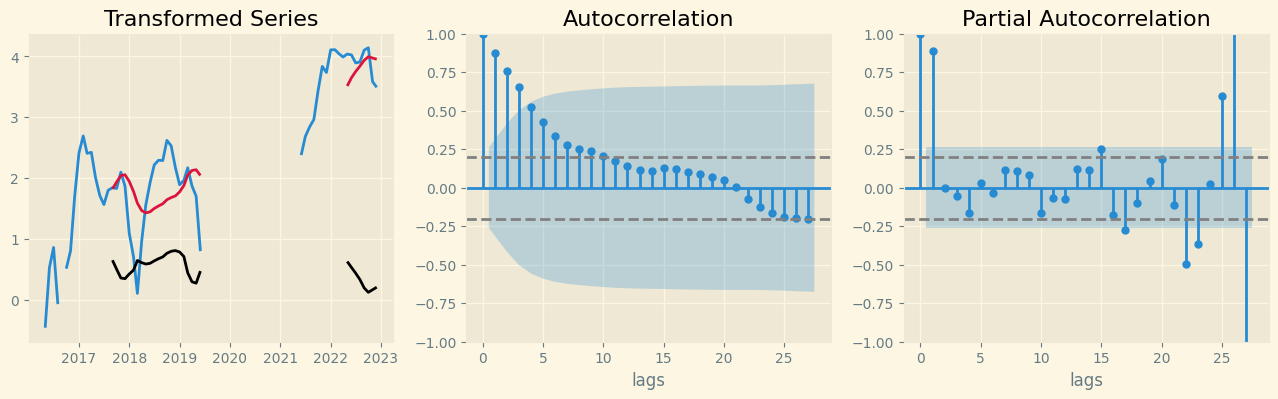

P-value = 0.192539, the series is likely non-stationary.


In [5]:
# natural logarithm transformation
series_transformation(df['y'].apply(np.log), num_lags=27)

# A log transformation is a bad choice. It obviously does not support negative values 
# and we can spot that some series are missing. Other two plots display signs of a 
# trended time series. The ACF plot (center) shows the correlations with the lags are 
# high and positive with some decay. While the PACF plot (right) shows the partial 
# autocorrelations have a single spike at lag 1.

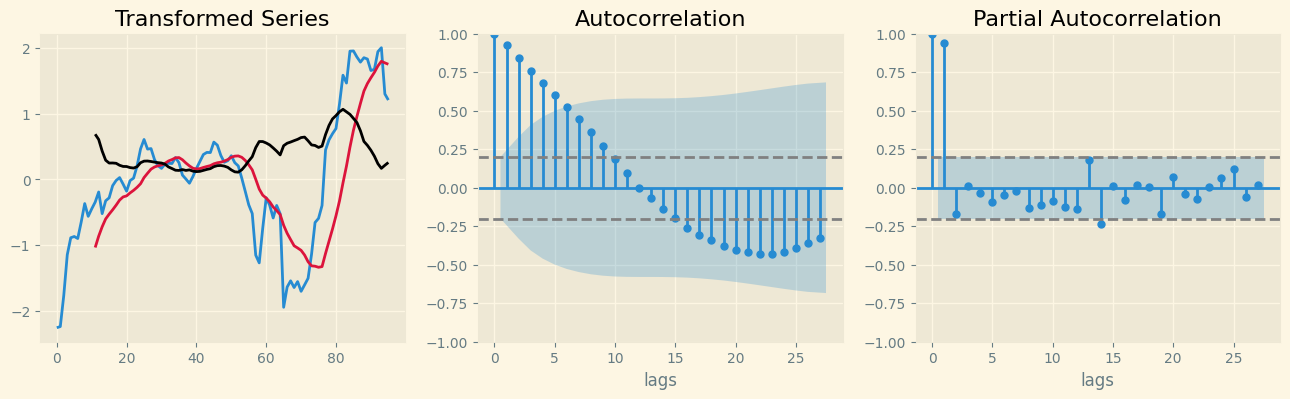

P-value = 0.266510, the series is likely non-stationary.


In [8]:
from sklearn.preprocessing import power_transform

# Yeo-Johnson power transformation
series_transformation(pd.DataFrame(power_transform(df[0:], method='yeo-johnson', standardize=True)), num_lags=27)

#The Yeo-Johnson transformation did not work enough for this dataset and
# p-value is still too high. The ACF graph shows strong trend and gradual decay. 
# The insights for PACF are similar as in previous step.

ValueError: Can only compute partial correlations for lags up to 50% of the sample size. The requested nlags 30 must be < 26.

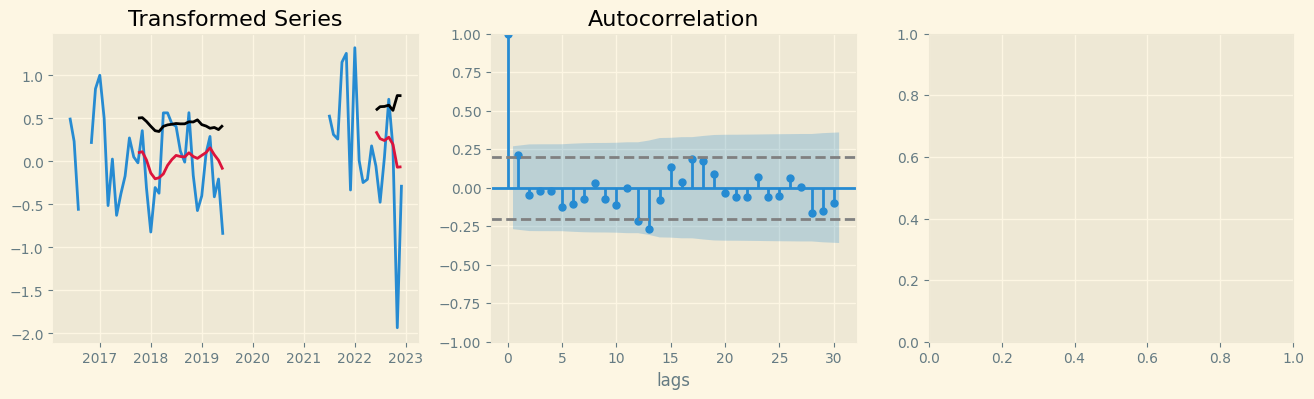

In [25]:
# combine square root and differencing
series_transformation(np.sqrt(df).diff(), num_lags=30)

# Similarly as the log transformation, the square root does not support negative values and
#  series are missing. Otherwise, it could be accepted.

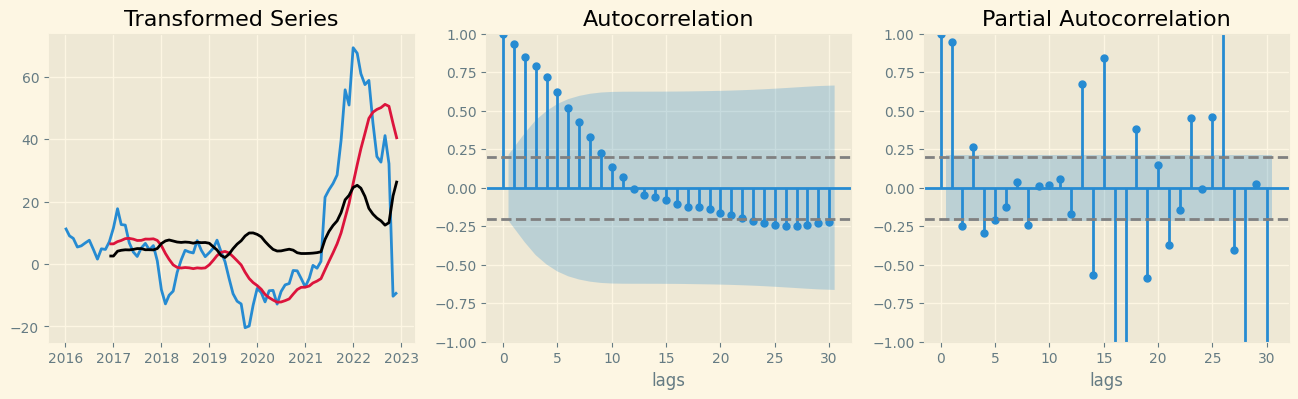

P-value = 0.419001, the series is likely non-stationary.


In [26]:
# seasonal difference
series_transformation(df - df.shift(12), num_lags=30)

# The threshold value is significantly higher then excepted. There are still visible trends in time series.

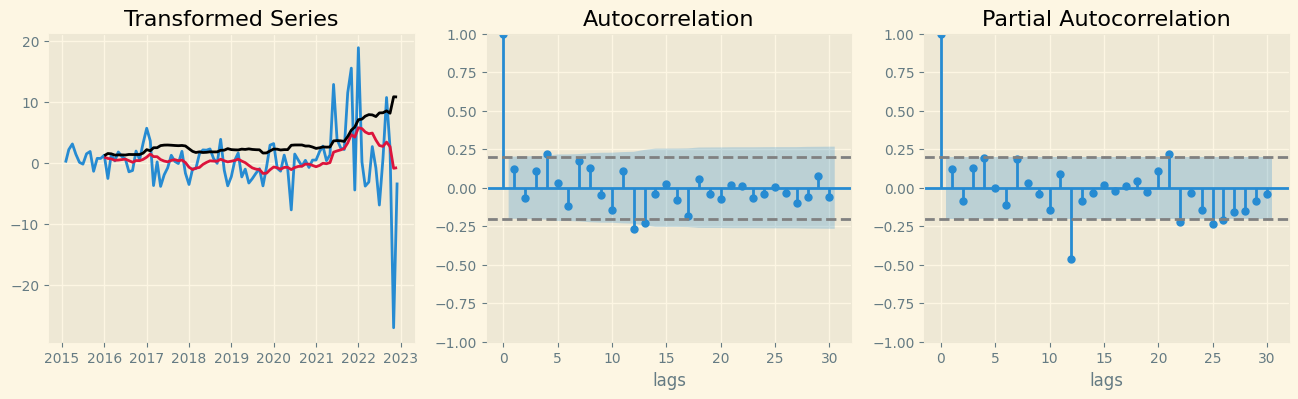

P-value = 0.012979, the series is likely stationary.


In [27]:
# first difference
series_transformation(df.diff(), num_lags=30)

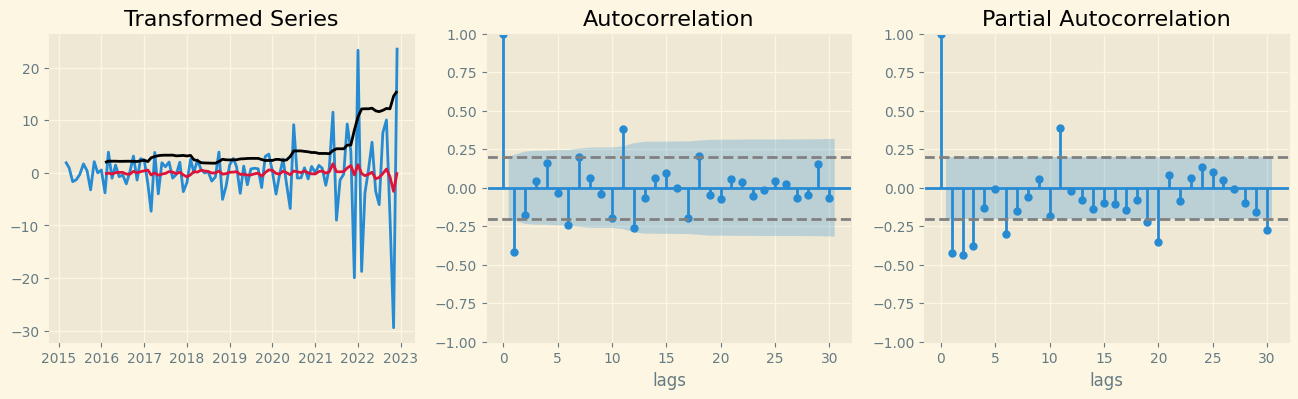

P-value = 0.768761, the series is likely non-stationary.


In [20]:
# second difference
series_transformation(df.diff().diff(), num_lags=30)

# The second difference time series doesn’t show a strong trend anymore. 
# The first lag autocorrelation is negative and the ACF plot is patternless. 
# The series likely does not need a higher order of differencing. 
# The first lag autocorrelation did not reach -0.5 and the series should 
# not be over-differenced. Implementing another differencing order 
# will increase the standard deviation and series will over-difference, which can result in additional complexity.

In [28]:
# Find best orders and evaluate each combination for SARIMAX model
def find_optimal_orders(series, verbose=False):
    # filter out harmless warnings
    from statsmodels.tools.sm_exceptions import ConvergenceWarning, ValueWarning
    warnings.simplefilter('ignore', (ConvergenceWarning, ValueWarning))
    
    from statsmodels.tsa.statespace.sarimax import SARIMAX
    
    ######### list of possible combinations
    #Contains all possible combinations of (p,d,q) values to be used as the order parameter for the SARIMAX model
    order_list = []
    # loop through all possible combinations of p, d, and q values
    for p in range(0, 2):
            # loop through all possible combinations of d and q values
            for d in range(0, 2):
                # loop through all possible combinations of q values
                for q in range(0, 2):
                    # append the order combination to the order_list
                    order_list.append((p, d, q))
    
    ######### initialize variables
    m = 12
    # trend_pdq and seasonal_pdq,  are populated with the possible combinations of the order parameters and the seasonal frequency.
    trend_pdq = order_list

    # seasonal_pdq is populated with the possible combinations of the seasonal order parameters and the seasonal frequency.
    seasonal_pdq = [(x[0], x[1], x[2], m) for x in order_list]
    min_aic = float('inf')
    best_params = {'order': None, 'seasonal_order': None}
    
    ######### loop through every possible configuration and print results
    print('Expected Fits: {}'.format(len(trend_pdq) * len(trend_pdq)))
    print('========== SARIMAX Results ==========\n')
    count = 0
    # loop through every possible combination of the order parameters and the seasonal frequency.
    for param in trend_pdq:
        # loop through every possible combination of the seasonal order parameters and the seasonal frequency.
        for param_seasonal in seasonal_pdq:
            try:
                # fit the SARIMAX model with the current order and seasonal order parameters
                # enforce_stationarity and enforce_invertibility are set to False to avoid convergence warnings
                # freq is set to None because the series is already stationary
                # exog is set to None because the series does not have any exogenous variables
                
                model = SARIMAX(endog=series, order=param, seasonal_order=param_seasonal, freq=None, exog=None,
                                enforce_stationarity=False, enforce_invertibility=False)
            
                # the model is fit using the MLE method
                model_fit = model.fit()
                
                # If the verbose parameter is set to True, the function will print the results of the model fit,
                # including the AIC and BIC values. It also keeps track of the number of iterations.
                if verbose:
                    count += 1
                    print('{}. SARIMAX{}{}[{}],\tAIC = {:.6f},\tBIC = {:.6f}'.format(count, param,
                                                        param_seasonal[:-1], m, model_fit.aic, model_fit.bic))

                # If the AIC value of the current model is less than the current minimum AIC value, 
                # the current order and seasonal order parameters are stored as the best parameters.
                   
                if model_fit.aic < min_aic:
                    min_aic = model_fit.aic
                    best_params['order'] = param
                    best_params['seasonal_order'] = param_seasonal
                    line = count
            except:
                # If the model fails to fit, the function will print an error message and continue to the next iteration.
                print('Error while fitting model')
                continue

    # The function will return the best parameters and the minimum AIC value.        
    print('\nBest order: {}{}[{}] with AIC = {:.6f} at line {}'.format(best_params['order'],
                                                             best_params['seasonal_order'][:-1], m, min_aic, line))

In [29]:
# display results
find_optimal_orders(df['y'], verbose=False)

Expected Fits: 64
========== SARIMAX Results ==========

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.44250D+00    |proj g|=  3.32584D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      1      3      1     0     0   1.141D-06   4.442D+00
  F =   4.4424888980678965     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variab

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.20480D+00    |proj g|=  3.57601D-01

At iterate    5    f=  3.88685D+00    |proj g|=  1.53344D-02

At iterate   10    f=  3.84587D+00    |proj g|=  3.45803D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     15      1     0     0   1.799D-08   3.846D+00
  F =   3.8457923580227718     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.13452D+00    |proj g|=  4.77125D-01

At iterate    5    f=  3.04018D+00    |proj g|=  3.57571D-02

At iterate   10    f=  2.94198D+00    |proj g|=  8.89400D-02

At iterate   15    f=  2.92730D+00    |proj g|=  1.22520D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     26      1     0     0   1.237D-07   2.927D+00
  F =   2.9272187932766385     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  3.43374D+00    |proj g|=  1.96373D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     16     20      1     0     0   7.306D-05   3.434D+00
  F =   3.4337420781601131     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.05320D+00    |proj g|=  6.94627D-01

At iterate    5    f=  3.53600D+00    |proj g|=  2.70292D-02

At iterate   10    f=  3.39571D+00    |proj g|=  1.35429D-01

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  3.03749D+00    |proj g|=  3.24987D-01

At iterate   20    f=  3.00614D+00    |proj g|=  1.36475D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     50      1     1     0   1.088D-04   3.006D+00
  F =   3.0061383504274191     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.13795D+00    |proj g|=  4.68148D-01
  ys=-5.834E-03  -gs= 3.582E-03 BFGS update SKIPPED

At iterate    5  


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   15    f=  2.93804D+00    |proj g|=  6.44408D-01

At iterate   20    f=  2.92729D+00    |proj g|=  5.31515D-02

At iterate   25    f=  2.92722D+00    |proj g|=  3.94278D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     27     43      1     1     0   2.183D-04   2.927D+00
  F =   2.9272185826744628     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.94057D+00    |proj g|=  4.31781D-03

       

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.57106D+00    |proj g|=  2.18399D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   2.184D-06   2.571D+00
  F =   2.5710568666850460     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.5

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  2.50504D+00    |proj g|=  9.30390D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     11      1     0     0   3.165D-07   2.505D+00
  F =   2.5049420625339915     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.85512D+00    |proj g|=  5.62421D-03

At iterate    5    f=  2.85503D+00    |proj g|=  7.05920D-04

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.39943D+00    |proj g|=  3.05548D-02

At iterate    5    f=  2.37876D+00    |proj g|=  2.29099D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7      9      1     0     0   3.228D-06   2.379D+00
  F =   2.3787633180516825     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 v

 This problem is unconstrained.
 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate   10    f=  2.74880D+00    |proj g|=  8.66016D-02

At iterate   15    f=  2.69781D+00    |proj g|=  1.10319D-01

At iterate   20    f=  2.67393D+00    |proj g|=  9.97083D-02

At iterate   25    f=  2.66365D+00    |proj g|=  1.29401D-01

At iterate   30    f=  2.65617D+00    |proj g|=  5.09969D-02

At iterate   35    f=  2.65229D+00    |proj g|=  1.28873D-01

At iterate   40    f=  2.64997D+00    |proj g|=  2.72634D-01

At iterate   45    f=  2.64789D+00    |proj g|=  1.04671D-01

At iterate   50    f=  2.64682D+00    |proj g|=  2.34980D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     50     71   

 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  2.37354D+00    |proj g|=  9.49516D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     16      1     0     0   5.528D-06   2.373D+00
  F =   2.3734734068104362     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.88067D+00    |proj g|=  5.05749D-01

At iterate    5    f=  2.57081D+00    |proj g|=  1.81905D-02

At iterate   10    f=  2.56823D+00    |proj g|=  3.91798D-05

       

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  2.32855D+00    |proj g|=  6.17943D-02

At iterate   15    f=  2.32767D+00    |proj g|=  5.38675D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     21      1     0     0   3.740D-06   2.328D+00
  F =   2.3276717965493550     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.92715D+00    |proj g|=  9.54202D-03

At iterate    5    f=  2.92706D+00    |proj g|=  2.91551D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  2.86865D+00    |proj g|=  2.77733D-03

At iterate   10    f=  2.86853D+00    |proj g|=  1.54384D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     13      1     0     0   2.968D-06   2.869D+00
  F =   2.8685349199667631     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.59161D+00    |proj g|=  3.70674D-01

At iterate    5    f=  2.36909D+00    |proj g|=  3.46325D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  2.64622D+00    |proj g|=  1.59493D-01

At iterate   10    f=  2.63848D+00    |proj g|=  3.39447D-02

At iterate   15    f=  2.58191D+00    |proj g|=  3.29332D-02

At iterate   20    f=  2.55915D+00    |proj g|=  1.27060D-01

At iterate   25    f=  2.54679D+00    |proj g|=  2.96176D-02

At iterate   30    f=  2.54159D+00    |proj g|=  9.26176D-02

At iterate   35    f=  2.53794D+00    |proj g|=  5.29589D-02

At iterate   40    f=  2.53574D+00    |proj g|=  1.00607D-01

At iterate   45    f=  2.53447D+00    |proj g|=  5.97546D-02

At iterate   50    f=  2.53374D+00    |proj g|=  1.42120D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  2.28557D+00    |proj g|=  7.67783D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     20      1     0     0   1.515D-05   2.286D+00
  F =   2.2855657357034445     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.93213D+00    |proj g|=  4.95715D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.53328D+00    |proj g|=  2.98410D-02

At iterate    5    f=  2.53153D+00    |proj g|=  7.03114D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7      9      1     0     0   9.189D-07   2.532D+00
  F =   2.5315266098620537     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 v

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     18      1     0     0   1.064D-06   2.287D+00
  F =   2.2865145239352103     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.09456D+00    |proj g|=  4.48962D-01

At iterate    5    f=  2.90187D+00    |proj g|=  7.90660D-03

At iterate   10    f=  2.89327D+00    |proj g|=  2.65731D-02
  ys=-2.466E-03  -gs= 2.045E-04 BFGS update SKIPPED

At iterate   15  

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  2.32126D+00    |proj g|=  5.79958D-02

At iterate   10    f=  2.30350D+00    |proj g|=  6.16138D-03

At iterate   15    f=  2.29731D+00    |proj g|=  1.00672D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     22      1     0     0   2.391D-06   2.297D+00
  F =   2.2971903627156771     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.71673D+00    |proj g|=  3.94290D-01

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  2.47840D+00    |proj g|=  3.09285D-02

At iterate   20    f=  2.47698D+00    |proj g|=  8.20603D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     36      1     0     0   3.023D-05   2.477D+00
  F =   2.4769712301800677     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.44564D+00    |proj g|=  3.34155D-01

At iterate    5    f=  2.34804D+00    |proj g|=  8.11703D-03

At iter

 This problem is unconstrained.



At iterate   15    f=  2.25037D+00    |proj g|=  1.12213D-02

At iterate   20    f=  2.25032D+00    |proj g|=  2.12928D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     32      1     0     0   5.057D-06   2.250D+00
  F =   2.2503199521370991     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            

Best order: (0, 1, 1)(1, 1, 1)[12] with AIC = 440.290876 at line 0


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.33924D+00    |proj g|=  9.91727D-02

At iterate    5    f=  2.25976D+00    |proj g|=  6.88600D-02

At iterate   10    f=  2.25153D+00    |proj g|=  1.52740D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     16      1     0     0   2.532D-06   2.252D+00
  F =   2.2515149793715898     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


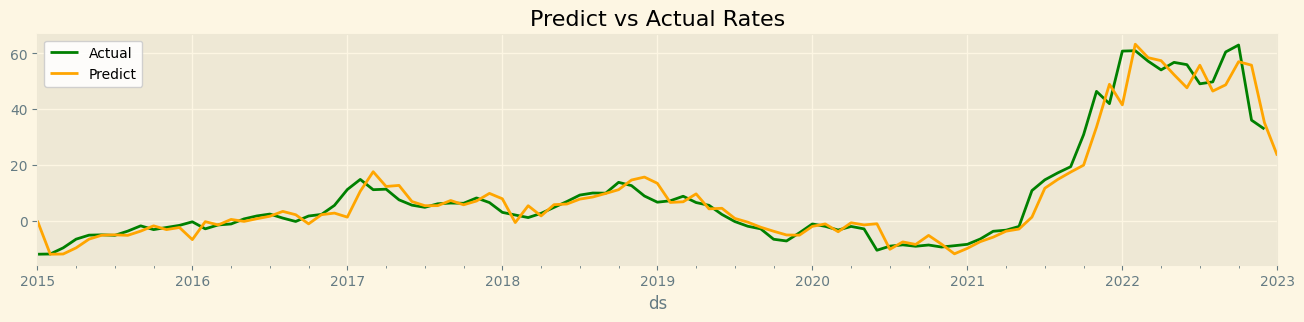

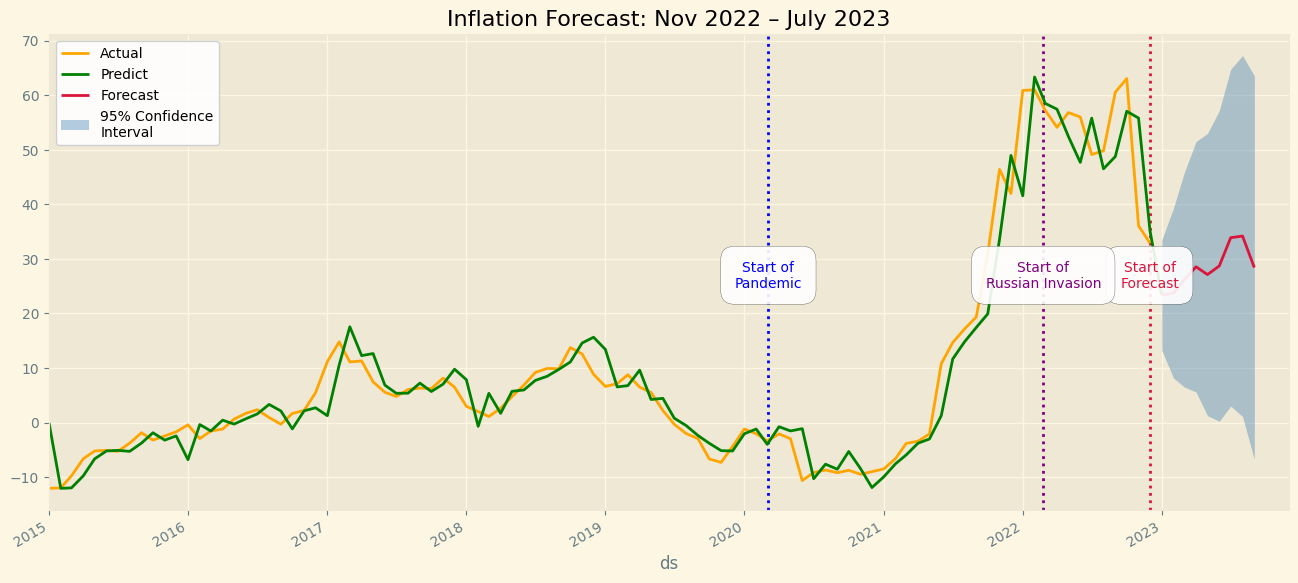

,Forecast [%]
2023-01-01,23.4
2023-02-01,23.8
2023-03-01,26.2
2023-04-01,28.6
2023-05-01,27.1
2023-06-01,28.7
2023-07-01,33.9
2023-08-01,34.2
2023-09-01,28.4


In [30]:
# SARIMA model visualization
def forecast_SARIMA(series, order=(0, 0, 0), seasonal_order=(0, 0, 0, 0), exog=None):
    from statsmodels.tools.sm_exceptions import ConvergenceWarning, ValueWarning
    warnings.simplefilter('ignore', (ConvergenceWarning, ValueWarning))
    from statsmodels.tsa.statespace.sarimax import SARIMAX
    
    # develop model
    model = SARIMAX(endog=series, order=order, seasonal_order=seasonal_order, freq='MS', exog=exog,
                    enforce_stationarity=False, enforce_invertibility=False)
    model_fit = model.fit()
    
    # predictions
    yhat = model_fit.predict(start=0, end=len(series), typ='levels', dynamic=False).rename('Predict')

    # forecast and confidence intervals 95%
    conf_int = model_fit.get_forecast(steps=6).summary_frame()
    
    # extract index list
    def index_list():
        conf_interval = conf_int.reset_index()
        return conf_interval['index'].to_list()

    indx_list = index_list()
    
    # 1st plot - actual vs predict rates
    series.plot(legend=True, label='Actual', figsize=(16, 3), color='green')
    yhat.plot(legend=True, color='orange')
    plt.title('Predict vs Actual Rates')
    plt.legend(facecolor='white', framealpha=0.9)
    plt.show()
    
    # list of events to plot
    event_list = [(pd.to_datetime('2020-03-04'), 'Start of\nPandemic', 'blue'),
                  (pd.to_datetime('2022-11-30'), 'Start of\nForecast', 'crimson'),
                  (pd.to_datetime('2022-02-24'), 'Start of\nRussian Invasion', 'purple')]
    
    # plot events
    for date_point, label, clr in event_list:
        plt.axvline(x=date_point, color=clr, linestyle=':')
        plt.text(x=date_point, y=27, s=label, horizontalalignment='center', verticalalignment='center',
                 color=clr, bbox=dict(facecolor='white', alpha=0.9, boxstyle='round, pad=1', linewidth=0.2))

    # 2nd plot - forecasting results
    series.plot(legend=True, label='Actual', figsize=(16, 7), color='orange')
    yhat.plot(legend=True, color='green')
    conf_int['mean'].plot(legend=True, label='Forecast', color='crimson')
    plt.fill_between(x=indx_list, y1=conf_int['mean_ci_upper'], y2=conf_int['mean_ci_lower'], color='steelblue',
                     alpha=0.4, label='95% Confidence\nInterval', linewidth=0)                
    plt.xlim(['2015', '2023-12'])
    plt.title('Inflation Forecast: Jan 203 – June 2023')
    plt.legend(loc='upper left', facecolor='white', framealpha=0.9)
    plt.show()
    
    # display forecasted rates
    return pd.DataFrame(round(conf_int['mean'], 1)).rename({'mean': 'Forecast [%]'}, axis=1)

# plot SARIMA results
forecast_SARIMA(series=df['y'], order=(0, 1, 1), seasonal_order=(1, 1, 1, 12))

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.33924D+00    |proj g|=  9.91727D-02

At iterate    5    f=  2.25976D+00    |proj g|=  6.88600D-02

At iterate   10    f=  2.25153D+00    |proj g|=  1.52740D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     16      1     0     0   2.532D-06   2.252D+00
  F =   2.2515149793715898     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


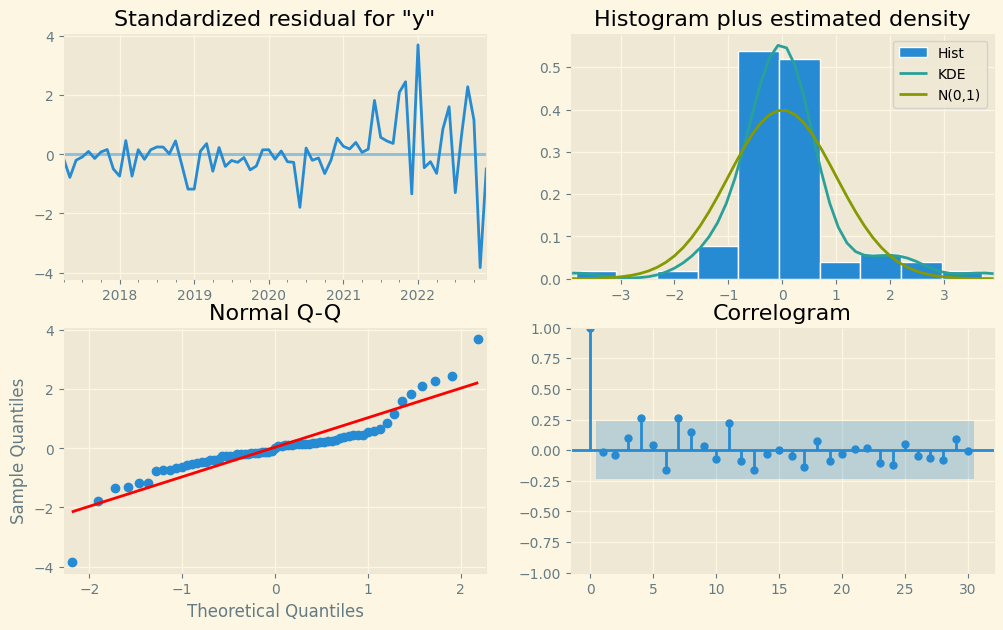

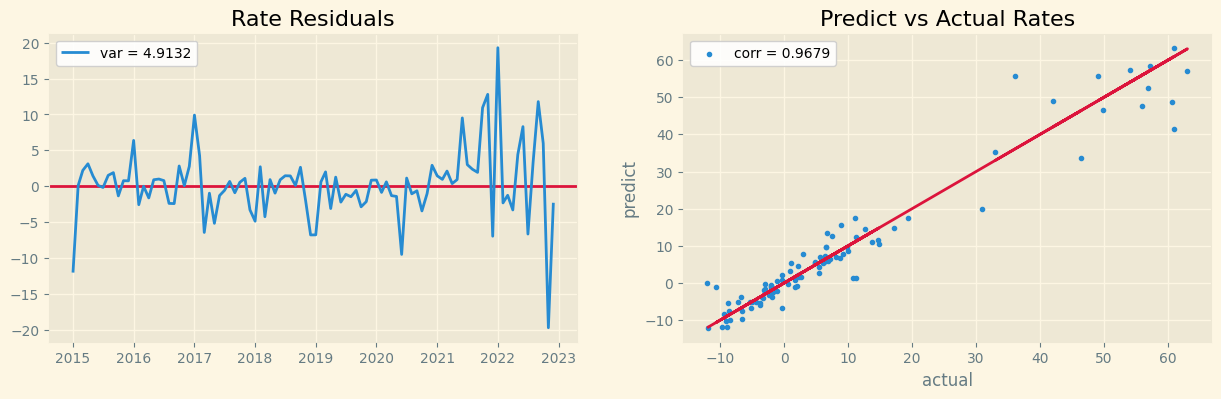

Metric,AIC,BIC,HQIC,RMSE,MAE,MAPE
,440.290876,449.227302,443.836255,4.917872,3.179787,0.720669


In [31]:
# SARIMA model evaluation
def evaluate_SARIMA(series, order=(0, 0, 0), seasonal_order=(0, 0, 0, 0), exog=None):
    from statsmodels.tools.sm_exceptions import ConvergenceWarning, ValueWarning
    warnings.simplefilter('ignore', (ConvergenceWarning, ValueWarning))
    from statsmodels.tsa.statespace.sarimax import SARIMAX

    # develop model
    model = SARIMAX(endog=series, order=order, seasonal_order=seasonal_order, freq='MS', exog=None,
                    enforce_stationarity=False, enforce_invertibility=False)
    model_fit = model.fit()
    
    # predictions
    yhat = model_fit.predict(start=0, end=len(series), typ='levels', dynamic=False).rename('Predict')
    
    ######### evaluation scores
    rmse = np.mean((series - yhat[:-1])**2)**0.5
    mae = np.mean(np.abs(series - yhat[:-1]))
    mape = np.mean(np.abs(series - yhat[:-1])/np.abs(series))
    var = np.std(model_fit.resid.values)
    corr = np.corrcoef(series, yhat[:-1])[0, 1]
    
    metric_list = ['AIC', 'BIC', 'HQIC', 'RMSE', 'MAE', 'MAPE']
    value_list = [model_fit.aic, model_fit.bic, model_fit.hqic, rmse, mae, mape]
 
    # 1st plot - diagnostics
    model_fit.plot_diagnostics(lags=30, figsize=(12, 7))
    plt.show()
    
    # 2nd plot - residuals
    fig = plt.figure(figsize=(15, 4))
    plt.subplot(1, 2, 1)
    plt.axhline(0, color='crimson')
    plt.plot(model_fit.resid, label='var = {:.4f}'.format(var))
    plt.title('Rate Residuals')
    plt.legend(facecolor='white', framealpha=0.9)
    
    # 3rd plot - actual vs predict rates
    plt.subplot(1, 2, 2)
    plt.plot(df['y'], df['y'], color='crimson')
    plt.scatter(x=df['y'], y=yhat[:-1], marker='.', label='corr = {:.4f}'.format(corr))
    plt.title('Predict vs Actual Rates')
    plt.xlabel('actual')
    plt.ylabel('predict')
    plt.legend(facecolor='white', framealpha=0.9)
    plt.show()

    # display evaluation scores
    return pd.DataFrame(zip(metric_list, value_list), columns=['Metric', '']).set_index('Metric').T

# model evaluation
evaluate_SARIMA(series=df['y'],  order=(0, 1, 1), seasonal_order=(1, 1, 1, 12))